In [10]:
#Importing necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [11]:
#Loading the dataset
file_path = file_path = r"/Users/Nikoo/Desktop/Google DataAnalytics/Course8:CapstoneProject/PersonalCaseStudy/guilan_construction_material.xlsx"


# Load the Normalized sheet
df_norm = pd.read_excel(file_path, sheet_name="Normalized")

# Quick preview
df_norm.head()


,Material,Porosity_%,WaterAbsorption_%,MoisturePermeability_g/m2_day,Density_kg_m3,ThermalConductivity_W_mK,CorrosionRisk_1_10,MoldRisk_1_10,Maintenance_1_10,MoisturePermeability,ThermalConductivity,Density,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore,Stage
0,Concrete,0.000000,7.991453,5.491266,8.260870,6.250000,7.5,7.5,7.5,5.489186,6.251287,8.259887,3.387720,8.041616,2.734066,Structural
1,Rebar Steel,1.666667,1.623932,3.187773,0.147826,5.086207,0.0,7.5,7.5,3.182286,5.087539,0.146893,2.206956,3.696450,6.408791,Structural
2,Cement Block,3.240741,8.589744,6.539301,6.586957,9.439655,2.5,0.0,7.5,6.539650,9.443872,6.587571,2.885359,9.596083,4.690110,Structural
3,Clay Brick,10.000000,0.128205,5.000000,0.000000,0.000000,10.0,5.0,2.5,4.994851,0.000000,0.000000,5.684843,0.000000,2.778022,Structural
4,AAC Block,6.358025,2.735043,4.268559,6.286957,2.198276,7.5,5.0,2.5,4.263646,2.203913,6.293785,4.383856,4.308446,4.149451,Structural


In [12]:
#Descriptive statistics
# Numeric columns
numeric_cols = df_norm.select_dtypes(include="number").columns.tolist()

# Overall descriptive statistics
desc_overall = df_norm[numeric_cols].describe().T
print("=== Descriptive statistics (overall, normalized) ===")
display(desc_overall)

# By Stage (Structural vs Finishing)
if "Stage" in df_norm.columns:
    desc_by_stage = df_norm.groupby("Stage")[numeric_cols].agg(["mean", "std", "min", "max"])
    print("\n=== Descriptive statistics by Stage (normalized) ===")
    display(desc_by_stage)


=== Descriptive statistics (overall, normalized) ===


,count,mean,std,min,25%,50%,75%,max
Porosity_%,60.0,5.215535,2.926604,0.0,2.615741,5.817901,6.936728,10.0
WaterAbsorption_%,60.0,5.607550,3.046147,0.0,3.076923,5.747863,8.589744,10.0
MoisturePermeability_g/m2_day,60.0,4.836790,3.061187,0.0,2.068777,5.005459,7.319869,10.0
Density_kg_m3,60.0,4.817754,3.136649,0.0,2.055435,4.776087,7.591304,10.0
ThermalConductivity_W_mK,60.0,4.939655,2.665715,0.0,2.747845,4.741379,6.864224,10.0
CorrosionRisk_1_10,60.0,4.750000,3.702381,0.0,2.500000,5.000000,7.500000,10.0
MoldRisk_1_10,60.0,4.666667,3.334039,0.0,2.500000,5.000000,7.500000,10.0
Maintenance_1_10,60.0,5.541667,3.825972,0.0,2.500000,5.000000,10.000000,10.0
MoisturePermeability,60.0,4.836938,3.063947,0.0,2.064882,5.005149,7.330072,10.0
ThermalConductivity,60.0,4.963783,2.674493,0.0,2.772915,4.768280,6.884655,10.0



=== Descriptive statistics by Stage (normalized) ===


Porosity_%                                WaterAbsorption_%  \
                 mean       std       min        max              mean   
Stage                                                                    
Finishing    4.661523  2.901885  0.030864   9.845679          6.729345   
Structural   5.769547  2.892991  0.000000  10.000000          4.485755   

                                          MoisturePermeability_g/m2_day  \
                 std       min        max                          mean   
Stage                                                                     
Finishing   2.393392  2.606838   9.786325                      4.606623   
Structural  3.247465  0.000000  10.000000                      5.066958   

                      ... MoistureRiskIndex             \
                 std  ...               min        max   
Stage                 ...                                
Finishing   3.234875  ...          0.000000  10.000000   
Structural  2.913906  ...          0.815801   8.595964   

           ThermalSensitivityIndex                                 \
                              mean       std       min        max   
Stage                                                               
Finishing                 6.070583  2.138695  0.930233   9.228886   
Structural                5.288046  2.449574  0.000000  10.000000   

           ClimateDurabilityScore                                 
                             mean       std       min        max  
Stage                                                             
Finishing                3.856703  2.427080  0.000000  10.000000  
Structural               3.838535  1.900591  0.320879   7.841758  

[2 rows x 56 columns]

=== Correlation matrix ===


,Porosity_%,WaterAbsorption_%,MoisturePermeability_g/m2_day,Density_kg_m3,ThermalConductivity_W_mK,CorrosionRisk_1_10,MoldRisk_1_10,Maintenance_1_10,MoisturePermeability,ThermalConductivity,Density,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore
Porosity_%,1.000000,-0.149884,0.098506,-0.050741,-0.104577,-0.144487,0.203309,-0.145155,0.098227,-0.105760,-0.053467,0.787236,-0.119069,-0.310508
WaterAbsorption_%,-0.149884,1.000000,-0.186970,0.049629,0.102501,0.045647,-0.073685,0.144371,-0.186355,0.105723,0.056033,0.243902,0.120772,-0.280709
MoisturePermeability_g/m2_day,0.098506,-0.186970,1.000000,-0.160399,0.037329,0.110417,-0.145609,0.057442,0.999999,0.035885,-0.162865,0.034783,-0.068099,-0.119000
Density_kg_m3,-0.050741,0.049629,-0.160399,1.000000,-0.043481,-0.192724,-0.307628,-0.305697,-0.159994,-0.041451,0.999446,-0.193618,0.565171,0.385239
ThermalConductivity_W_mK,-0.104577,0.102501,0.037329,-0.043481,1.000000,0.078945,-0.209858,-0.060851,0.037265,0.999957,-0.042258,-0.138140,0.799207,0.016206
CorrosionRisk_1_10,-0.144487,0.045647,0.110417,-0.192724,0.078945,1.000000,-0.135592,-0.050105,0.110443,0.078529,-0.193547,-0.144430,-0.051402,-0.476099
MoldRisk_1_10,0.203309,-0.073685,-0.145609,-0.307628,-0.209858,-0.135592,1.000000,0.180485,-0.145827,-0.211277,-0.306147,0.617241,-0.357816,-0.392952
Maintenance_1_10,-0.145155,0.144371,0.057442,-0.305697,-0.060851,-0.050105,0.180485,1.000000,0.057415,-0.060378,-0.303945,0.052901,-0.232187,-0.607926
MoisturePermeability,0.098227,-0.186355,0.999999,-0.159994,0.037265,0.110443,-0.145827,0.057415,1.000000,0.035827,-0.162440,0.034720,-0.067892,-0.118975
ThermalConductivity,-0.105760,0.105723,0.035885,-0.041451,0.999957,0.078529,-0.211277,-0.060378,0.035827,1.000000,-0.039995,-0.138572,0.800600,0.016328


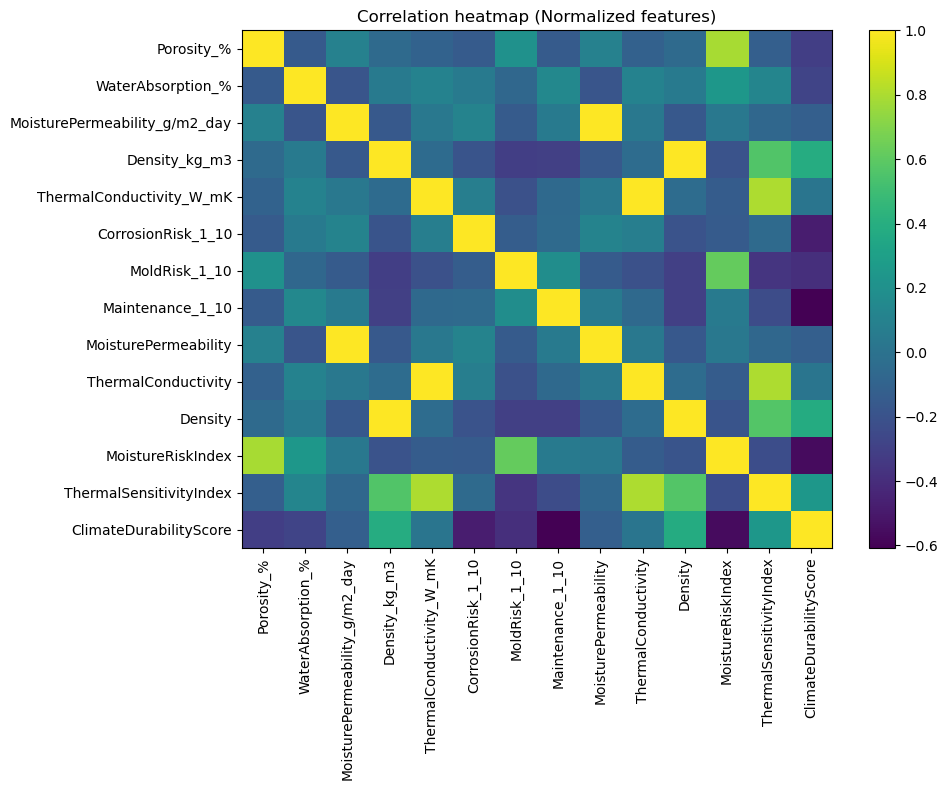

In [13]:
#Correlation matrix + heatmap

corr = df_norm[numeric_cols].corr()

print("=== Correlation matrix ===")
display(corr)

plt.figure(figsize=(10, 8))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Correlation heatmap (Normalized features)")
plt.tight_layout()
plt.show()


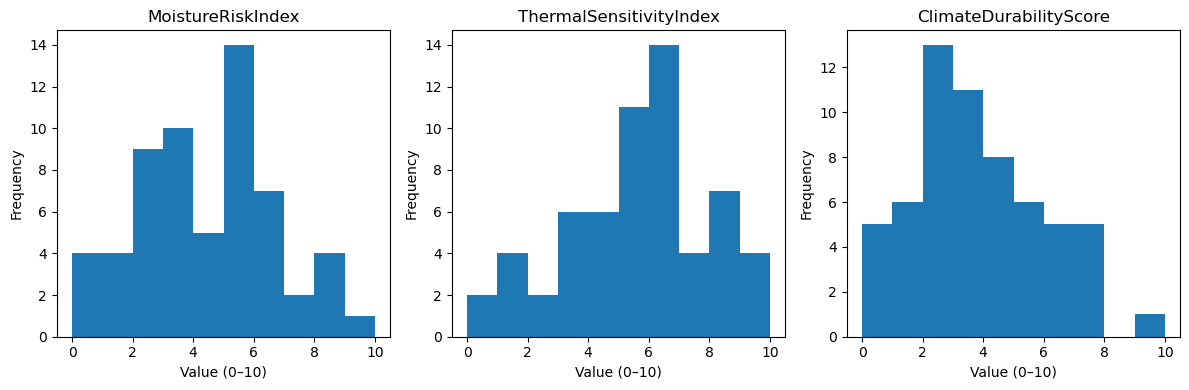

In [23]:
#Histogram of MRI, TSI, and CDS distributions

metrics = ["MoistureRiskIndex", "ThermalSensitivityIndex", "ClimateDurabilityScore"]

plt.figure(figsize=(12, 4))

for i, col in enumerate(metrics, start=1):
    plt.subplot(1, 3, i)
    plt.hist(df_norm[col].dropna(), bins=10)
    plt.title(col)
    plt.xlabel("Value (0–10)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


/var/folders/3k/q9hztqf54tn0zgnbt7m6mxy80000gn/T/ipykernel_46189/1788031142.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
/var/folders/3k/q9hztqf54tn0zgnbt7m6mxy80000gn/T/ipykernel_46189/1788031142.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(
/var/folders/3k/q9hztqf54tn0zgnbt7m6mxy80000gn/T/ipykernel_46189/1788031142.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


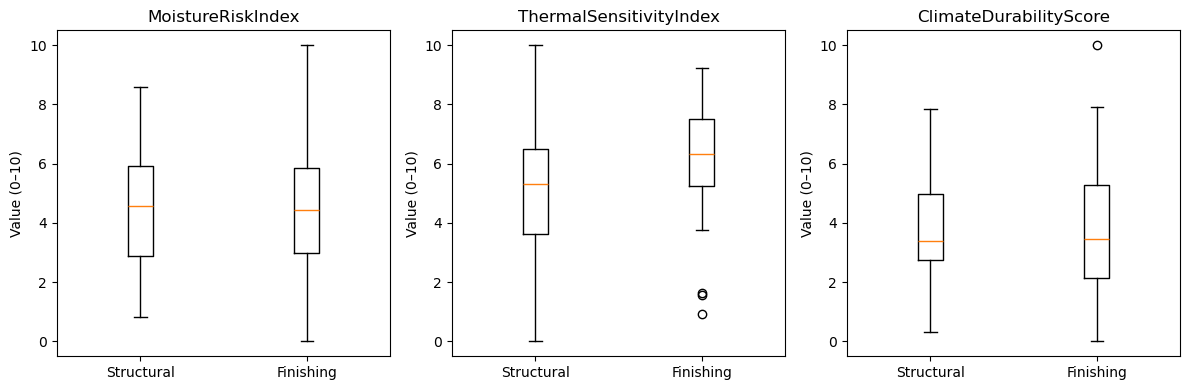

In [26]:
#Boxplots of MRI, TSI, CDS by construction phase

df_plot = df_norm.copy()
plt.figure(figsize=(12, 4))

for i, col in enumerate(metrics, start=1):
    plt.subplot(1, 3, i)
    
    data_struct = df_plot[df_plot["Stage"] == "Structural"][col]
    data_finish = df_plot[df_plot["Stage"] == "Finishing"][col]
    
    plt.boxplot(
        [data_struct.dropna(), data_finish.dropna()],
        labels=["Structural", "Finishing"]
    )
    plt.title(col)
    plt.ylabel("Value (0–10)")

plt.tight_layout()
plt.show()


In [14]:
#Rankings by ClimateDurabilityScore (Top 10 & Bottom 10)

rank_col = "ClimateDurabilityScore"

if rank_col in df_norm.columns:
    sorted_df = df_norm.sort_values(by=rank_col, ascending=False)

    cols_to_show = ["Material", "Stage", rank_col] if "Material" in df_norm.columns else [rank_col]

    top10 = sorted_df.head(10)
    bottom10 = sorted_df.tail(10)

    print("=== Top 10 materials by ClimateDurabilityScore (normalized) ===")
    display(top10[cols_to_show])

    print("\n=== Bottom 10 materials by ClimateDurabilityScore (normalized) ===")
    display(bottom10[cols_to_show])
else:
    print("Column 'ClimateDurabilityScore' not found.")


=== Top 10 materials by ClimateDurabilityScore (normalized) ===


,Material,Stage,ClimateDurabilityScore
34,Wood Panel,Finishing,10.000000
38,Acrylic Paint,Finishing,7.925275
19,Adobe Brick,Structural,7.841758
31,Gypsum Board,Finishing,7.709890
12,Foam Concrete,Structural,7.556044
30,Gypsum Plaster,Finishing,7.520879
43,HDF Flooring,Finishing,6.778022
13,Lightweight Block,Structural,6.628571
1,Rebar Steel,Structural,6.408791
27,Grouted Masonry,Structural,6.096703



=== Bottom 10 materials by ClimateDurabilityScore (normalized) ===


,Material,Stage,ClimateDurabilityScore
52,Microcement,Finishing,1.890110
20,Pumice Block,Structural,1.762637
36,Vinyl Flooring,Finishing,1.257143
47,Glass Block,Finishing,1.213187
50,Wallpaper,Finishing,1.072527
23,Shotcrete,Structural,0.980220
41,Cement Plaster,Finishing,0.883516
29,Stabilized Soil Block,Structural,0.751648
28,Expanded Clay Aggregate,Structural,0.320879
39,Latex Paint,Finishing,0.000000


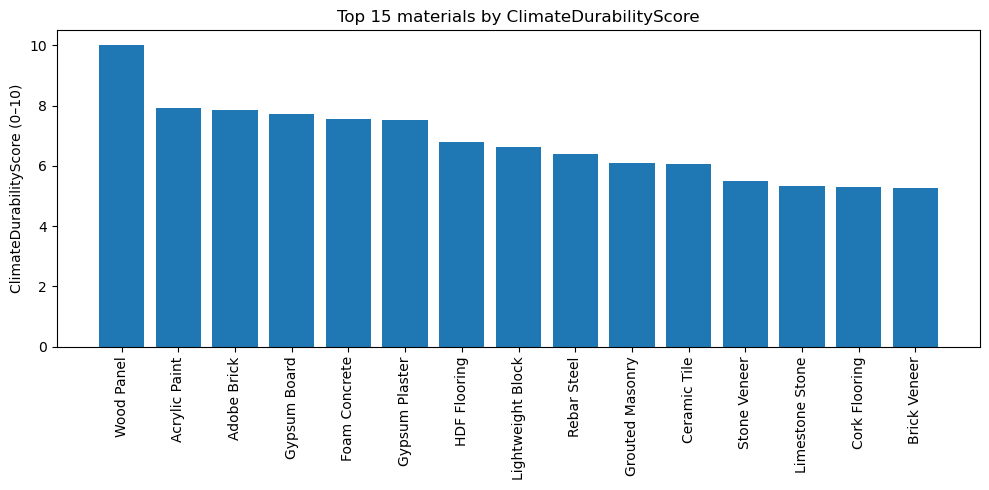

In [15]:
#Bar chart: Top 15 materials by ClimateDurabilityScore
rank_col = "ClimateDurabilityScore"

if rank_col in df_norm.columns and "Material" in df_norm.columns:
    top15 = df_norm.sort_values(by=rank_col, ascending=False).head(15)

    plt.figure(figsize=(10, 5))
    plt.bar(top15["Material"], top15[rank_col])
    plt.xticks(rotation=90)
    plt.ylabel("ClimateDurabilityScore (0–10)")
    plt.title("Top 15 materials by ClimateDurabilityScore")
    plt.tight_layout()
    plt.show()
else:
    print("Need 'Material' and 'ClimateDurabilityScore' columns for this plot.")


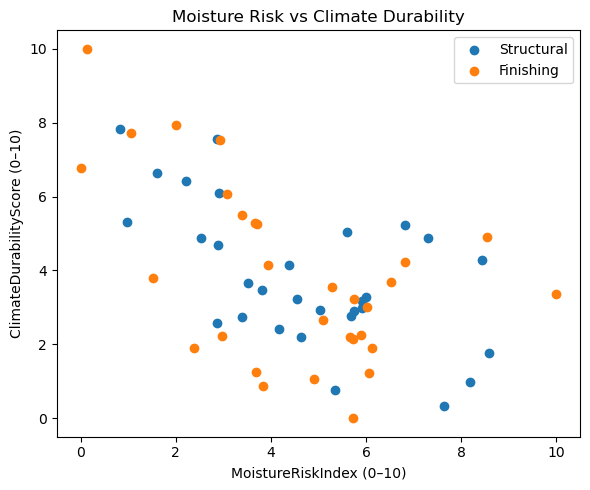

In [16]:
#Scatter: MoistureRiskIndex vs ClimateDurabilityScore (by phase)

rank_col = "ClimateDurabilityScore"

if all(col in df_norm.columns for col in ["MoistureRiskIndex", rank_col, "Stage"]):
    plt.figure(figsize=(6, 5))

    for stage in df_norm["Stage"].unique():
        subset = df_norm[df_norm["Stage"] == stage]
        plt.scatter(subset["MoistureRiskIndex"], subset[rank_col], label=stage)

    plt.xlabel("MoistureRiskIndex (0–10)")
    plt.ylabel("ClimateDurabilityScore (0–10)")
    plt.title("Moisture Risk vs Climate Durability")
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Need 'MoistureRiskIndex', 'ClimateDurabilityScore', and 'Stage' columns for this plot.")


/var/folders/3k/q9hztqf54tn0zgnbt7m6mxy80000gn/T/ipykernel_46189/1613196425.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_struct, data_finish],


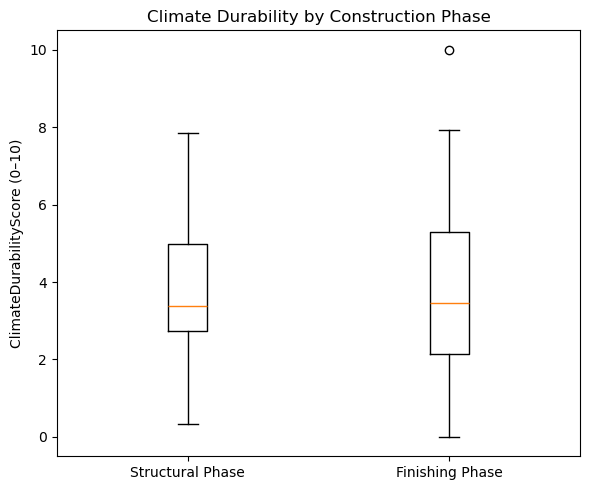

In [17]:
#Boxplot: ClimateDurabilityScore by Structural vs Finishing
rank_col = "ClimateDurabilityScore"

if "Stage" in df_norm.columns and rank_col in df_norm.columns:
    data_struct = df_norm[df_norm["Stage"] == "Structural"][rank_col]
    data_finish = df_norm[df_norm["Stage"] == "Finishing"][rank_col]

    plt.figure(figsize=(6, 5))
    plt.boxplot([data_struct, data_finish],
                labels=["Structural Phase", "Finishing Phase"])
    plt.ylabel("ClimateDurabilityScore (0–10)")
    plt.title("Climate Durability by Construction Phase")
    plt.tight_layout()
    plt.show()
else:
    print("Need 'Stage' and 'ClimateDurabilityScore' columns for boxplot.")


=== Cluster centers (in 0–10 engineered feature space) ===


,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore
0,4.574567,2.291922,3.003297
1,2.016423,7.128978,6.443681
2,5.799565,6.224755,2.866209


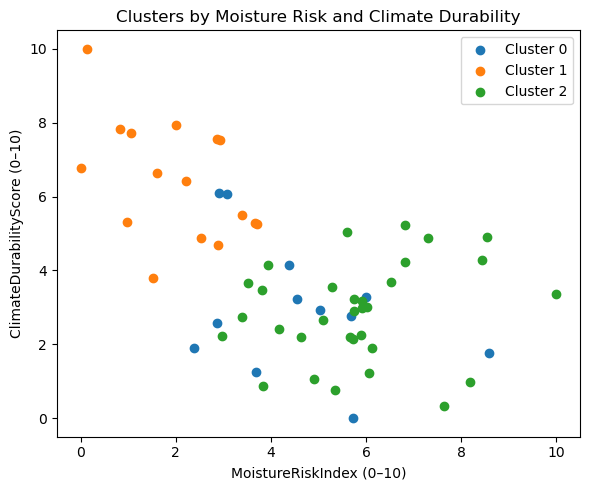

In [18]:
#Clustering:
#We’ll cluster using:MoistureRiskIndex, ThermalSensitivityIndex, ClimateDurabilityScore

cluster_features = ["MoistureRiskIndex", "ThermalSensitivityIndex", "ClimateDurabilityScore"]
available_cluster_features = [c for c in cluster_features if c in df_norm.columns]

if available_cluster_features:
    X = df_norm[available_cluster_features].values

    # Standardize for clustering (even though they are 0–10, this makes KMeans more stable)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # k=3 clusters for interpretation
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    df_norm["Cluster"] = clusters

    # Cluster centers in original 0–10 feature space
    cluster_centers = pd.DataFrame(
        scaler.inverse_transform(kmeans.cluster_centers_),
        columns=available_cluster_features
    )

    print("=== Cluster centers (in 0–10 engineered feature space) ===")
    display(cluster_centers)

    # Scatter plot of clusters (MoistureRiskIndex vs ClimateDurabilityScore)
    if "MoistureRiskIndex" in df_norm.columns and "ClimateDurabilityScore" in df_norm.columns:
        plt.figure(figsize=(6, 5))
        for cl in sorted(df_norm["Cluster"].unique()):
            subset = df_norm[df_norm["Cluster"] == cl]
            plt.scatter(subset["MoistureRiskIndex"],
                        subset["ClimateDurabilityScore"],
                        label=f"Cluster {cl}")
        plt.xlabel("MoistureRiskIndex (0–10)")
        plt.ylabel("ClimateDurabilityScore (0–10)")
        plt.title("Clusters by Moisture Risk and Climate Durability")
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print("Engineered feature columns for clustering not found.")


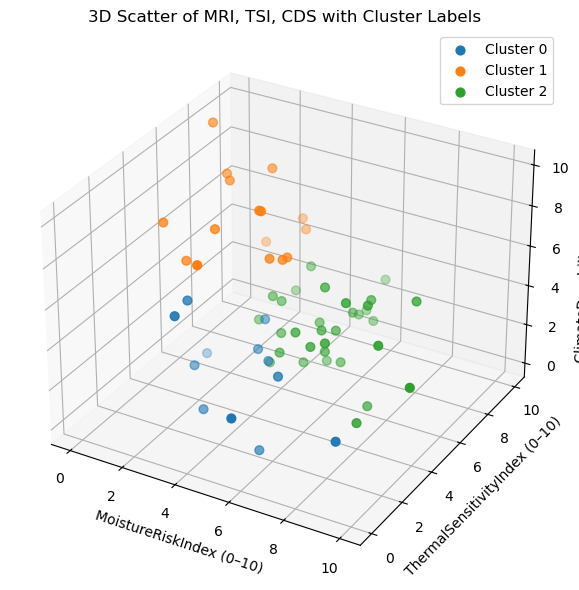

In [28]:
#3D Scatter plot 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

for cl in sorted(df_norm["Cluster"].unique()):
    subset = df_norm[df_norm["Cluster"] == cl]
    ax.scatter(
        subset["MoistureRiskIndex"],
        subset["ThermalSensitivityIndex"],
        subset["ClimateDurabilityScore"],
        label=f"Cluster {cl}",
        s=40
    )

ax.set_xlabel("MoistureRiskIndex (0–10)")
ax.set_ylabel("ThermalSensitivityIndex (0–10)")
ax.set_zlabel("ClimateDurabilityScore (0–10)")
ax.set_title("3D Scatter of MRI, TSI, CDS with Cluster Labels")
ax.legend()

plt.tight_layout()
plt.show()

In [19]:
#Modeling and scoring: FinalClimateScore_raw=0.5(10−MRI)+0.2(10−TSI)+0.3(CDS)
# Check columns exist
for col in ["MoistureRiskIndex", "ThermalSensitivityIndex", "ClimateDurabilityScore"]:
    if col not in df_norm.columns:
        raise ValueError(f"Required column missing: {col}")

# Moisture-dominant weights
w_mri = 0.5   # MoistureRiskIndex 
w_tsi = 0.2   # ThermalSensitivityIndex 
w_cds = 0.3   # ClimateDurabilityScore 

# Raw weighted score
df_norm["FinalClimateScore_raw"] = (
    w_mri * (10 - df_norm["MoistureRiskIndex"]) +
    w_tsi * (10 - df_norm["ThermalSensitivityIndex"]) +
    w_cds * df_norm["ClimateDurabilityScore"]
)

# Rescale FinalClimateScore_raw to 0–10
fs_min = df_norm["FinalClimateScore_raw"].min()
fs_max = df_norm["FinalClimateScore_raw"].max()

if fs_max == fs_min:
    df_norm["FinalClimateScore"] = 5.0  # degenerate case
else:
    df_norm["FinalClimateScore"] = 10 * (df_norm["FinalClimateScore_raw"] - fs_min) / (fs_max - fs_min)

df_norm[["Material", "Stage", "MoistureRiskIndex", "ThermalSensitivityIndex",
         "ClimateDurabilityScore", "FinalClimateScore"]].head()


,Material,Stage,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore,FinalClimateScore
0,Concrete,Structural,3.387720,8.041616,2.734066,3.786371
1,Rebar Steel,Structural,2.206956,3.696450,6.408791,7.991930
2,Cement Block,Structural,2.885359,9.596083,4.690110,4.651670
3,Clay Brick,Structural,5.684843,0.000000,2.778022,4.562773
4,AAC Block,Structural,4.383856,4.308446,4.149451,4.891480


In [20]:
#Rank materials by FinalClimateScore
# Sort descending by FinalClimateScore
df_ranked = df_norm.sort_values("FinalClimateScore", ascending=False)

cols_to_show = [
    "Material", "Stage",
    "FinalClimateScore",
    "MoistureRiskIndex", "ThermalSensitivityIndex", "ClimateDurabilityScore"
]

# Top 10 overall
top10_overall = df_ranked.head(10)[cols_to_show]
print("=== Top 10 materials by FinalClimateScore (overall) ===")
display(top10_overall)

# Top 5 Structural Phase
top5_struct = df_ranked[df_ranked["Stage"] == "Structural"].head(5)[cols_to_show]
print("\n=== Top 5 STRUCTURAL materials by FinalClimateScore ===")
display(top5_struct)

# Top 5 Finishing Phase
top5_finish = df_ranked[df_ranked["Stage"] == "Finishing"].head(5)[cols_to_show]
print("\n=== Top 5 FINISHING materials by FinalClimateScore ===")
display(top5_finish)


=== Top 10 materials by FinalClimateScore (overall) ===


,Material,Stage,FinalClimateScore,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore
34,Wood Panel,Finishing,10.000000,0.133104,8.151775,10.000000
43,HDF Flooring,Finishing,9.503025,0.000000,5.165239,6.778022
19,Adobe Brick,Structural,8.461123,0.815801,7.894737,7.841758
31,Gypsum Board,Finishing,8.271154,1.056247,7.674419,7.709890
6,Limestone Stone,Structural,8.043594,0.966080,5.006120,5.318681
32,Ceramic Tile,Finishing,8.027238,3.069987,0.930233,6.074725
1,Rebar Steel,Structural,7.991930,2.206956,3.696450,6.408791
13,Lightweight Block,Structural,7.905887,1.601546,5.801714,6.628571
27,Grouted Masonry,Structural,7.831389,2.915414,1.946144,6.096703
38,Acrylic Paint,Finishing,7.211577,1.996565,8.873929,7.925275



=== Top 5 STRUCTURAL materials by FinalClimateScore ===


,Material,Stage,FinalClimateScore,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore
19,Adobe Brick,Structural,8.461123,0.815801,7.894737,7.841758
6,Limestone Stone,Structural,8.043594,0.966080,5.006120,5.318681
1,Rebar Steel,Structural,7.991930,2.206956,3.696450,6.408791
13,Lightweight Block,Structural,7.905887,1.601546,5.801714,6.628571
27,Grouted Masonry,Structural,7.831389,2.915414,1.946144,6.096703



=== Top 5 FINISHING materials by FinalClimateScore ===


,Material,Stage,FinalClimateScore,MoistureRiskIndex,ThermalSensitivityIndex,ClimateDurabilityScore
34,Wood Panel,Finishing,10.000000,0.133104,8.151775,10.000000
43,HDF Flooring,Finishing,9.503025,0.000000,5.165239,6.778022
31,Gypsum Board,Finishing,8.271154,1.056247,7.674419,7.709890
32,Ceramic Tile,Finishing,8.027238,3.069987,0.930233,6.074725
38,Acrylic Paint,Finishing,7.211577,1.996565,8.873929,7.925275


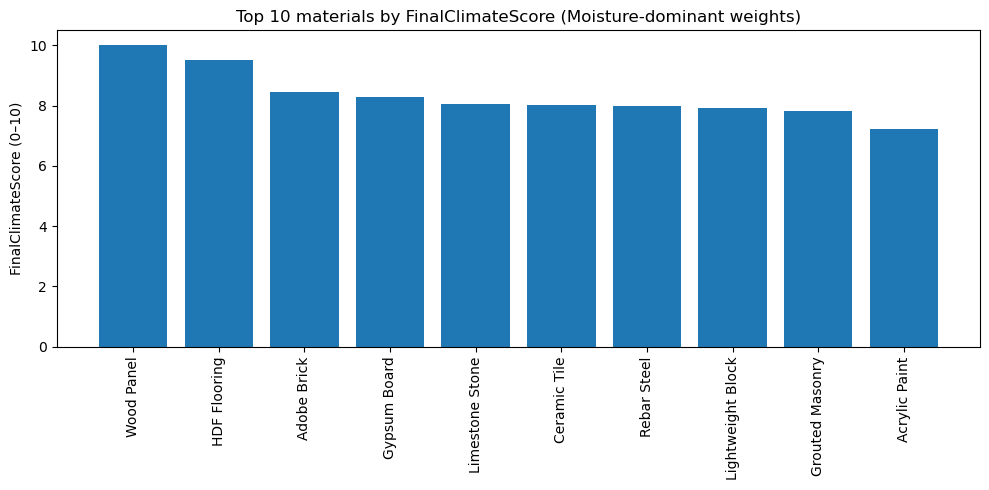

In [21]:
#Bar chart of Top 10 final scores
plt.figure(figsize=(10, 5))
plt.bar(top10_overall["Material"], top10_overall["FinalClimateScore"])
plt.xticks(rotation=90)
plt.ylabel("FinalClimateScore (0–10)")
plt.title("Top 10 materials by FinalClimateScore (Moisture-dominant weights)")
plt.tight_layout()
plt.show()


In [22]:
#Save updated normalized sheet with FinalClimateScore
out_path = "guilan_construction_normalized_with_final_score.xlsx"
df_norm.to_excel(out_path, sheet_name="Normalized", index=False)

out_path



'guilan_construction_normalized_with_final_score.xlsx'